In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.fonttype'] = 'none'


In [3]:
from load_data import load_data
mibig_metadata, mibig_pfam, mibig_cathdb, funfams, sbp, sbp_all_pfam, bios = load_data()

(851, 20)
(918, 166)
(1519, 17)
(96, 10)
(863, 29)
(1345, 100)


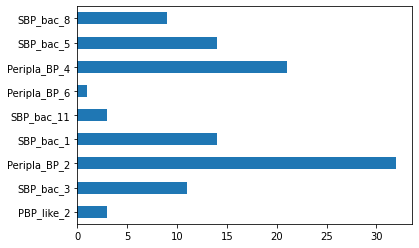

In [12]:
sbp[sbp.columns.drop("BGC")].sum().plot.barh()
plt.savefig('Fig2b.svg')

In [6]:
### Correlations
data = sbp_all_pfam[sbp_all_pfam.columns.drop("BGC")]
abund_cols = data.columns[data.sum() > 5]

rho, pval = scipy.stats.spearmanr(data[abund_cols])
rho[pval > 0.05 / (rho.shape[0]*rho.shape[1])] = 0
test = pd.DataFrame(rho)
test = test.set_index(abund_cols)
test.columns = abund_cols

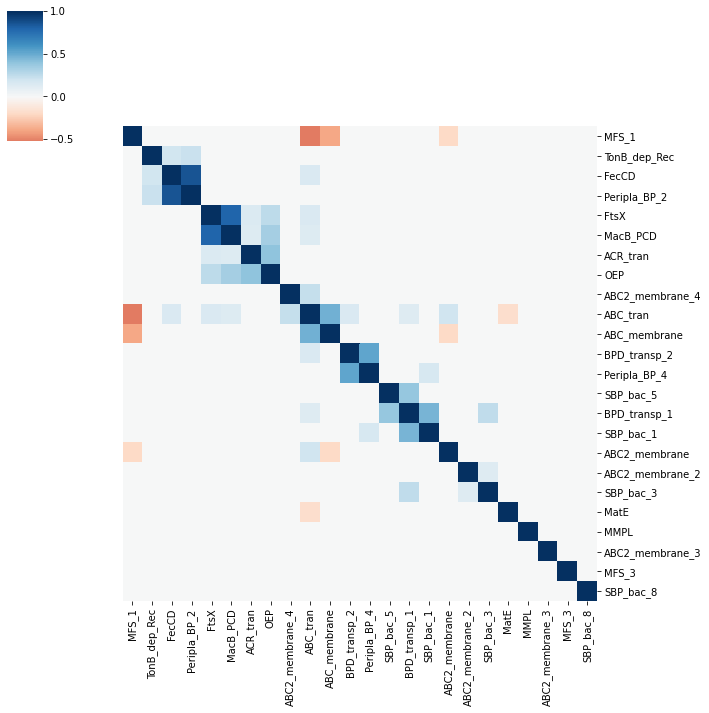

In [7]:
cg = sns.clustermap(test, cmap="RdBu", center=0)
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.savefig('Fig2a.svg')

In [8]:
tcdb = pd.read_csv('/groups/banfield/users/alexcc/song_collaboration/bgc_tran/data/metadata/tcdb_families.tsv', sep="\t")
cathdbs= funfams

In [9]:
importers = tcdb[tcdb.Type == 'import']
exporters = tcdb[(tcdb.Type == 'export') | (tcdb.Type =='efflux')]

In [10]:
import_cathdbs = []
export_cathdbs = []

for index, row in cathdbs.iterrows():
    ctype = None
    for fam in str(row['ALL_TCDBs']).split(","):
        if ctype == None:
            if fam in list(importers['TCDB']):
                ctype = 'import'
            elif fam in list(exporters['TCDB']):
                ctype = 'export'
            else:
                ctype = 'other'
        elif ctype == 'import' and fam not in list(importers['TCDB']):
            ctype = 'mix'
        elif ctype == 'export' and fam not in list(exporters['TCDB']):
            ctype = 'mix'
    if ctype == 'export':
        export_cathdbs.append(row['FunFam'])
    if ctype == 'import':
        import_cathdbs.append(row['FunFam'])

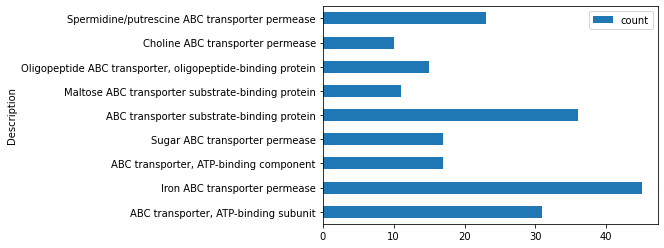

In [11]:
common_importers = mibig_cathdb[mibig_cathdb.columns[mibig_cathdb.columns.isin(import_cathdbs)]].sum()
common_importers = common_importers[common_importers >= 10]

testing = cathdbs[cathdbs.FunFam.isin(common_importers.keys())]

importers_df = common_importers.to_frame()
importers_df['FunFam'] = list(importers_df.index.astype(str))
importers_df['count'] = importers_df[0]
testing['FunFam'] = list(testing['FunFam'].astype(str))
testing = testing.reset_index()
testing = testing.merge(importers_df, on='FunFam')
# testing.set_index('Description')
testing.plot.barh('Description', 'count')
plt.savefig('Fig2c.svg')

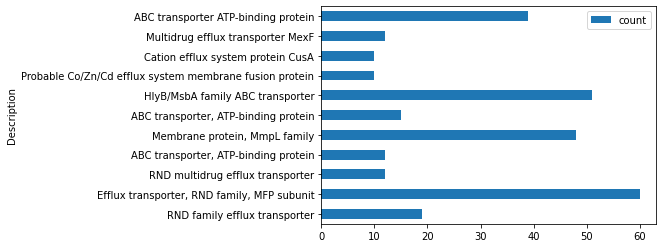

In [13]:
common_exporters = mibig_cathdb[mibig_cathdb.columns[mibig_cathdb.columns.isin(export_cathdbs)]].sum()
common_exporters = common_exporters[common_exporters >= 10]

testing = cathdbs[cathdbs.FunFam.isin(common_exporters.keys())]

importers_df = common_exporters.to_frame()
importers_df['FunFam'] = list(importers_df.index.astype(str))
importers_df['count'] = importers_df[0]
testing['FunFam'] = list(testing['FunFam'].astype(str))
testing = testing.reset_index()
testing = testing.merge(importers_df, on='FunFam')
# testing.set_index('Description')
testing.plot.barh('Description', 'count')